# This is nn


# MNIST

# Importing 

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/anaconda3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)


# Instalizing


In [ ]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 128


# Placeholder

In [ ]:
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float',[None,10])


In [ ]:
a,b = mnist.train.next_batch(batch_size)

In [ ]:
a[2]


In [ ]:

img = a[7]

plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


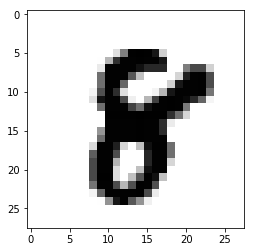

In [13]:

img = a[6]
print(b[6])
plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

# Creating Model

In [6]:
display()

NameError: name 'epoch_x' is not defined

In [5]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']
    
    return output

# Traning

In [6]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer(.5).minimize(cost)
    
    hm_epochs = 2
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(20):
                
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
     
        
        

# Calling 

In [14]:

train_neural_network(x)

Epoch 0 completed out of 2 loss: 26906122.900123596
Epoch 1 completed out of 2 loss: 46706.63346862793
Accuracy: 0.101
